In [2]:
import lightgbm as lgb
from utils.load import load_data, load_submission
from utils.feature import (
    add_hours,
    add_hours_trig_cyclic,
    apply_feature_engineering,
    get_dummies,
    fill_na_zero,
    drop_non_input_cols,
    normalize,
    standardize
)
from utils.model import ModelEvalWrapper

In [18]:
train_df, predict_df = load_data('../data')

In [19]:
_train_df, _predict_df = apply_feature_engineering(
    train_df,
    predict_df,
    funcs=[
        add_hours,
        fill_na_zero("all"),
        normalize(["txpower_cell0", "txpower_cell1", "txpower_cell2", "txpower_cell3"]),
        normalize(
            [
                "bandwidth_cell0",
                "antennas_cell0",
                "bandwidth_cell1",
                "antennas_cell1",
                "bandwidth_cell2",
                "antennas_cell2",
                "bandwidth_cell3",
                "antennas_cell3",
            ]
        ),
        get_dummies(
            [
                "hour",
                "rutype",
                "mode",
                "frequency_cell0",
                "frequency_cell1",
                "frequency_cell2",
                "frequency_cell3",
            ]
        ),
        drop_non_input_cols,
    ],
)

In [7]:
params = {
    "objective": "regression",
    "boosting_type": "gbdt",
    'learning_rate': 0.01,
    "n_jobs": -1,
    "max_depth": -1,
    "metric": "mae",
    "num_boost_round": 10000,
    "verbosity": 0,
}

early_stopping_callback = lgb.early_stopping(100, first_metric_only=True, verbose=False)

model_getter = lambda: lgb.LGBMRegressor(**params)
model_trainer = lambda model, X, y, *args, **kwargs: model.fit(
    X,
    y,
    callbacks=[early_stopping_callback],
    eval_set=[(kwargs["X_test"], kwargs["y_test"])],
)
model_predictor = lambda model, X: model.predict(X)
model_eval = ModelEvalWrapper(
    model_getter,
    name="LightGBM",
    model_trainer=model_trainer,
    model_predictor=model_predictor,
)

model_eval.train_and_eval(_train_df)


INFO:root:Fold 1/5
/home/sandil/Work/envBase/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000
[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000


INFO:root:Train MAE: 2.3705, MAPE: 0.0881, MSE: 11.5189
INFO:root:Test MAE: 2.5683, MAPE: 0.0951, MSE: 13.5556
INFO:root:Fold 2/5
/home/sandil/Work/envBase/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000
[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000


INFO:root:Train MAE: 2.3950, MAPE: 0.0890, MSE: 11.7232
INFO:root:Test MAE: 2.5359, MAPE: 0.0928, MSE: 13.3069
INFO:root:Fold 3/5
/home/sandil/Work/envBase/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000
[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000


INFO:root:Train MAE: 2.3754, MAPE: 0.0881, MSE: 11.6386
INFO:root:Test MAE: 2.5620, MAPE: 0.0944, MSE: 13.4924
INFO:root:Fold 4/5
/home/sandil/Work/envBase/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000
[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000


INFO:root:Train MAE: 2.3842, MAPE: 0.0884, MSE: 11.6897
INFO:root:Test MAE: 2.5211, MAPE: 0.0932, MSE: 13.0805
INFO:root:Fold 5/5
/home/sandil/Work/envBase/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000
[LightGBM] [Warning] num_iterations is set=10000, num_boost_round=10000 will be ignored. Current value: num_iterations=10000


INFO:root:Train MAE: 2.4014, MAPE: 0.0893, MSE: 11.8323
INFO:root:Test MAE: 2.5514, MAPE: 0.0940, MSE: 13.2527
INFO:root:
Best model from fold 4
INFO:root:Best model mae: 2.5211, mape: 0.0932 mse: 13.0805

INFO:root:Average mae: 2.5477, mape: 0.0939, mse: 13.3376
INFO:root:Std mae: 0.0173, mape: 0.0008, mse: 0.1707

INFO:root:Analytic evaluations for best model
INFO:root:Error metrics by number of cells in usage
INFO:root:Metrics for 0 cells in usage (87225 records): MAE: 2.4137, MAPE: 0.0914, MSE: 12.0347
INFO:root:Metrics for 1 cells in usage (5335 records): MAE: 2.3822, MAPE: 0.0562, MSE: 10.9385
INFO:root:No data for 2 cells in usage
INFO:root:Metrics for 3 cells in usage (40 records): MAE: 2.7270, MAPE: 0.0450, MSE: 11.4680


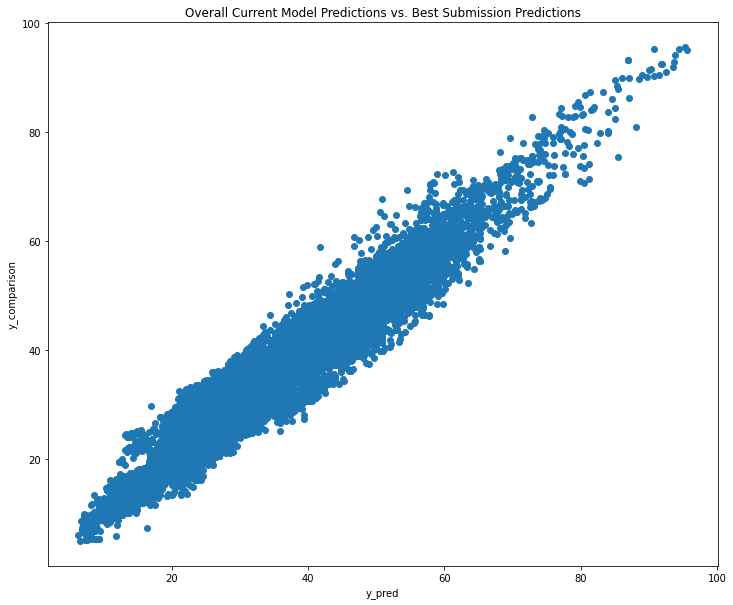

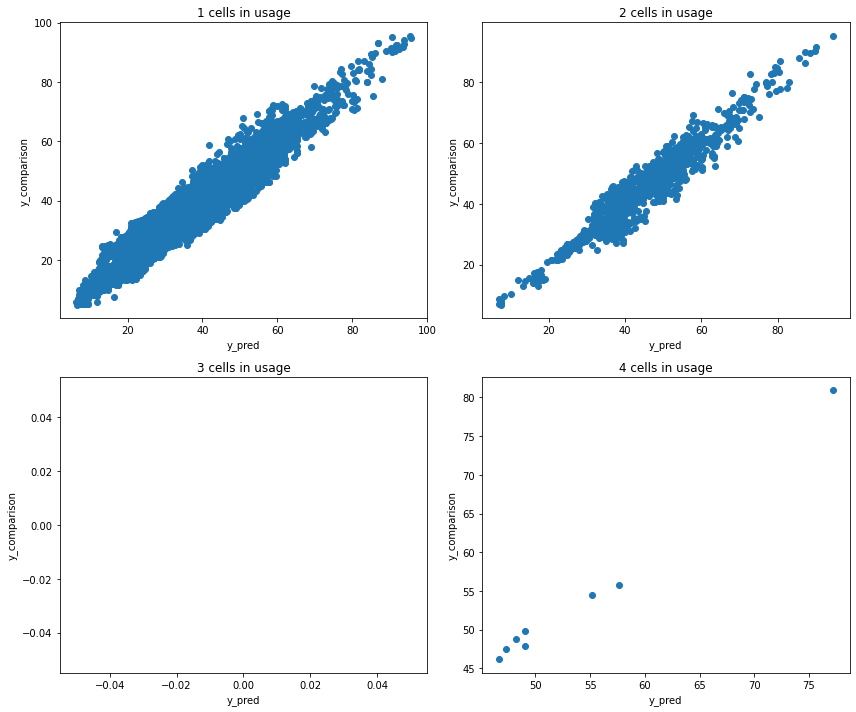

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
best_submission = load_submission("bestsubmission.csv")
model_eval.compare_predictions_with(_predict_df, best_submission['Energy'])